In [50]:
import pandas as pd 
from tqdm.notebook import tqdm

from datasets import load_dataset
from huggingface_hub import list_datasets
import torch

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

import numpy as np
import random

# Example categorical data

# Initialize the LabelEncoder

# Get a list of all datasets

In [3]:
all_datasets = list_datasets()
ds_l = list(all_datasets)
titanic_dataset_list = sorted([{'id': i.id, 'downloads' : i.downloads} for i in ds_l if 'titanic' in i.id.lower()],key=lambda x: x['downloads'], reverse=True)

In [8]:
titanic_dataset_hf = load_dataset("lewtun/titanic")
titanic_dataset_hf['train'][0], titanic_dataset_hf['test'][-1]

({'PassengerId': 1,
  'Survived': 0,
  'Pclass': 3,
  'Name': 'Braund, Mr. Owen Harris',
  'Sex': 'male',
  'Age': 22.0,
  'SibSp': 1,
  'Parch': 0,
  'Ticket': 'A/5 21171',
  'Fare': 7.25,
  'Cabin': None,
  'Embarked': 'S'},
 {'PassengerId': 1309,
  'Survived': -1,
  'Pclass': 3,
  'Name': 'Peter, Master. Michael J',
  'Sex': 'male',
  'Age': None,
  'SibSp': 1,
  'Parch': 1,
  'Ticket': '2668',
  'Fare': 22.3583,
  'Cabin': None,
  'Embarked': 'C'})

In [12]:
titanic_dataset_df_train = pd.DataFrame(titanic_dataset_hf['train'])
titanic_dataset_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [19]:
titanic_dataset_df_train[titanic_dataset_df_train.Cabin.str.startswith("B").fillna(False)].head()

/var/folders/2z/hm_pwbd91vjf6y817f4mp5pc0000gn/T/ipykernel_10730/3312721023.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_dataset_df_train[titanic_dataset_df_train.Cabin.str.startswith("B").fillna(False)].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,None
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C


In [47]:
# def custom_agg_func(sub_df):
#     return(5)

# titanic_dataset_df_train.groupby('Survived').agg(
#     product_of_age = ('Age', 'prod'),
#     prod_age_fare = 
 
# )

def product_sum(group):
    print(group.index)
    return group.head(2)

result = titanic_dataset_df_train.groupby('Survived').apply(
    func=product_sum
)

Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
       ...
       877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
      dtype='int64', length=549)
Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
       ...
       865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
      dtype='int64', length=342)


/var/folders/2z/hm_pwbd91vjf6y817f4mp5pc0000gn/T/ipykernel_10730/3952189283.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = titanic_dataset_df_train.groupby('Survived').apply(


In [48]:
result

PassengerId  Survived  Pclass  \
Survived                                    
0        0            1         0       3   
         4            5         0       3   
1        1            2         1       1   
         2            3         1       3   

                                                         Name     Sex   Age  \
Survived                                                                      
0        0                            Braund, Mr. Owen Harris    male  22.0   
         4                           Allen, Mr. William Henry    male  35.0   
1        1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
         2                             Heikkinen, Miss. Laina  female  26.0   

            SibSp  Parch            Ticket     Fare Cabin Embarked  
Survived                                                            
0        0      1      0         A/5 21171   7.2500  None        S  
         4      0      0            373450   8.0500  None        S  
1        1      1      0          PC 17599  71.2833   C85        C  
         2      0      0  STON/O2. 3101282   7.9250  None        S

In [68]:
trans = label_encoder.fit(titanic_dataset_df_train.Sex)
titanic_dataset_df_train['sex_transformed'] = trans.transform(titanic_dataset_df_train.Sex)

In [69]:
titanic_dataset_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,1


In [70]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [74]:
{label: index for index, label in enumerate(label_encoder.classes_)}

{'female': 0, 'male': 1}

In [77]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [89]:
#onehot_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to get a dense array
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit_transform(titanic_dataset_df_train['Pclass'].values.reshape(-1, 1))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [94]:
onehot_encoder.get_feature_names_out(['Pclass'])

array(['Pclass_1', 'Pclass_2', 'Pclass_3'], dtype=object)

In [95]:
import torch

[*********************100%***********************]  1 of 1 completed


ValueError: x and y must have same first dimension, but have shapes (77,) and (78,)

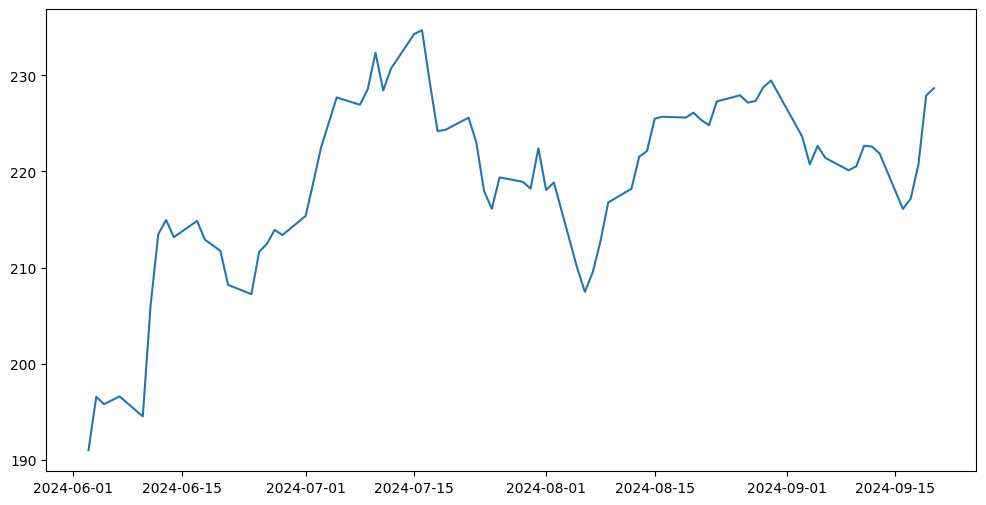

In [99]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Fetch stock data for the last 6 months
ticker = "AAPL"  # Example stock ticker
stock_data = yf.download(ticker, period="6mo", interval="1d")

# Keep only the 'Close' prices for simplicity
stock_data = stock_data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Use 50 days as the sequence length
seq_length = 50
X, y = create_sequences(scaled_data, seq_length)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Define the RNN model using torch.nn.Linear for transformations
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.W_XH = nn.Linear(input_size, hidden_size)
        self.W_AA = nn.Linear(hidden_size, hidden_size)
        self.W_AY = nn.Linear(hidden_size, output_size)
        self.h_t = torch.zeros(hidden_size)

    def forward(self, x):
        outputs = []
        batch_size = x.size(0)
        self.h_t = torch.zeros(batch_size, self.hidden_size)  # Reset hidden state for each forward pass
        for t in range(x.size(1)):
            self.h_t = torch.tanh(self.W_XH(x[:, t]) + self.W_AA(self.h_t))
            y_t = self.W_AY(self.h_t)
            outputs.append(y_t)
        return torch.stack(outputs, dim=1)[:, -1]

# Initialize the RNN
input_size = X.size(2)
hidden_size = 16
output_size = 1
rnn = SimpleRNN(input_size, hidden_size, output_size)

# Training parameters
learning_rate = 0.001
num_epochs = 10000
loss_fn = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)

# Training loop
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = rnn(X)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Make predictions
with torch.no_grad():
    predictions = rnn(X).numpy()

# Denormalize predictions
predicted_prices = scaler.inverse_transform(predictions)

# Running mean
running_mean = stock_data['Close'].rolling(window=50).mean().dropna().values

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[seq_length:], predicted_prices, label="RNN Prediction")
plt.plot(stock_data.index[seq_length:], running_mean, label="Running Mean", linestyle='--')
plt.plot(stock_data.index[seq_length:], stock_data['Close'][seq_length:], label="Actual Price", linestyle='-.')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction')
plt.show()

# Show the training loss plot
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()



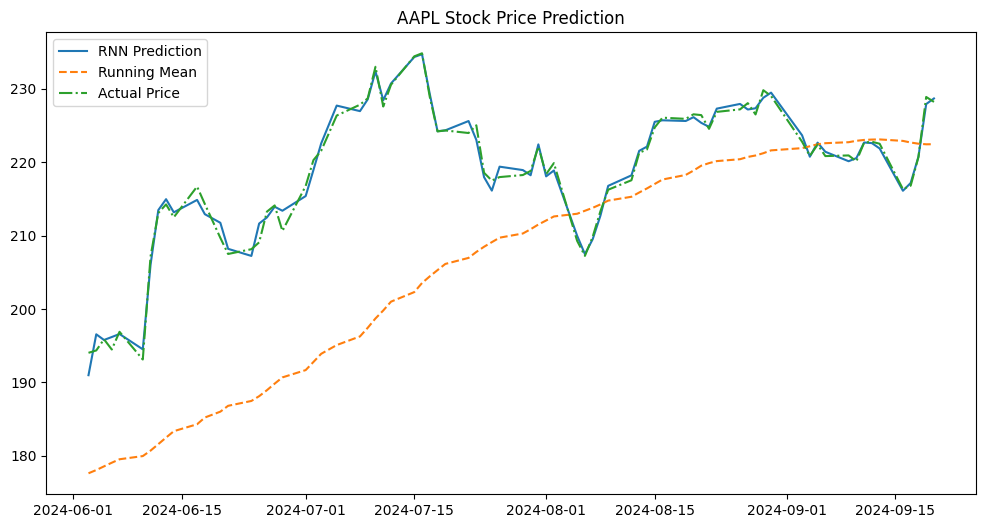

In [100]:
# Ensure both arrays have the same length by trimming the longer one
min_length = min(len(predicted_prices), len(running_mean))
predicted_prices = predicted_prices[-min_length:]  # Trim from the start
running_mean = running_mean[-min_length:]  # Trim from the start
actual_prices = stock_data['Close'][seq_length:].values[-min_length:]  # Trim the actual prices

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[seq_length:][-min_length:], predicted_prices, label="RNN Prediction")
plt.plot(stock_data.index[seq_length:][-min_length:], running_mean, label="Running Mean", linestyle='--')
plt.plot(stock_data.index[seq_length:][-min_length:], actual_prices, label="Actual Price", linestyle='-.')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction')
plt.show()


In [101]:
from datasets import load_dataset

# Load the WikiText-2 dataset
dataset = load_dataset('wikitext', 'wikitext-2-raw-v1', split='train')

# Display the first few lines
print(dataset['text'][:5])

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

['', ' = Valkyria Chronicles III = \n', '', ' Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n', " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgi